## 캐글 주택가격 데이터 세트,  Regression 실습
- https://www.kaggle.com/c/house-prices-advanced-regression-techniques/
- evaluation 방법 : Submissions are evaluated on Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price. => 즉 RMSLE로 평가
- Data description : https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

- Good example notebook : https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# 시각화 import
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### 1. 데이터 전처리

In [4]:
# 데이터 로딩 => 원본 DataFrame 생성  => 복사해서 전처리
house_df_org = pd.read_csv('./data/house/train.csv')
house_df = house_df_org.copy()
house_df.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [5]:
# 데이터 구조 확인
house_df_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
house_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
print('데이터셋의 shape : ', house_df.shape)

데이터셋의 shape :  (1460, 81)


In [8]:
print('피처들의 타입별 갯수 :\n ', house_df.dtypes.value_counts())

피처들의 타입별 갯수 :
  object     43
int64      35
float64     3
dtype: int64


object type(string) 은 주로 카테고리컬 할것 이다.라고 예측하고 진행하겠다

In [16]:
house_df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [9]:
# 결측치 개수 
isnull_ser = house_df.isnull().sum()
isnull_ser

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [10]:
# Null 을 포함하는 컬럼만 추출한 후, Null개수에 따른 내림차순 정렬
isnull_ser[isnull_ser>0].sort_values(ascending=False)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

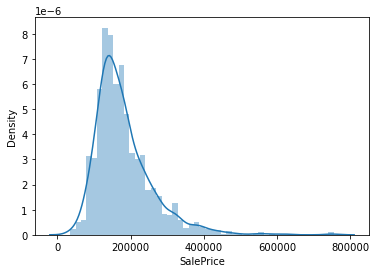

In [11]:
# 타깃 분포 시각화
sns.distplot(house_df['SalePrice'])

타겟값이 약간 쏠려있다. (Left skew)

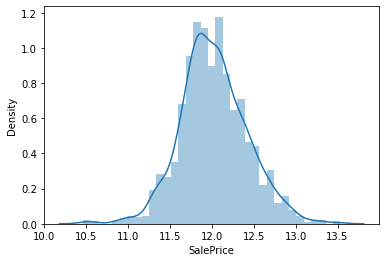

In [12]:
# log() 변환
log_SalePrice = np.log1p(house_df['SalePrice'])
sns.distplot(log_SalePrice)

정규분포에 약간 가까워 졌다

In [13]:
# SalePrice 로그 변환
original_SalePrice = house_df['SalePrice']  # 원래값은 다른 변수에 저장해두기
house_df['SalePrice']=np.log1p(original_SalePrice) # 로그변환해서 원래컬럼에 치환

In [14]:
# Null 1000 개 이상인 컬럼들과 불필요한 컬럼 삭제
drop_cols=['Id','PoolQC','MiscFeature','Alley','Fence','FireplaceQu']
house_df.drop(drop_cols, axis=1, inplace=True)

# 드롭하지 않은 숫자형 Null 값들은 각 컬럼의 평균값으로 대체
house_df.fillna(house_df.mean(), inplace=True)

In [15]:
isnull_ser = house_df.isnull().sum()
null_cols = isnull_ser[isnull_ser>0].sort_values(ascending=False).index

위 칼럼들은 숫자형이 아니기 때문에, 평균값으로 대체되지 않았고, 여전히 Null 값을 가지고 있다.

In [16]:
len(house_df.mean()), len(house_df.columns)
# 즉 75개의 컬럼중 37개가 숫자형 데이터가 아니다

(37, 75)

In [17]:
# null 인 컬럼은 object 밖에 없다. -> 즉 데이터타입 string
# 숫자인 컬럼은 평균치로 결측치를 채웠다.
house_df.dtypes[null_cols]

GarageCond      object
GarageQual      object
GarageFinish    object
GarageType      object
BsmtFinType2    object
BsmtExposure    object
BsmtFinType1    object
BsmtCond        object
BsmtQual        object
MasVnrType      object
Electrical      object
dtype: object

In [18]:
# 원 핫 처리 후, 널 여부 확인
print('수행전 shape:', house_df.shape)
house_df_ohe = pd.get_dummies(house_df)
print('수행 후 shape:', house_df_ohe.shape)

수행전 shape: (1460, 75)
수행 후 shape: (1460, 271)


In [19]:
isnull_ser = house_df_ohe.isnull().sum()
null_cols = isnull_ser[isnull_ser>0].sort_values(ascending=False).index
# 여기서 이미 Null 값을 가진 컬럼이 없어졌음을 확인할 수 있다. (원핫인코딩을 하면 Null 은 그냥 0,0, 0... 처리되니까.)
null_cols

Index([], dtype='object')

In [20]:
# Null 여부 확인
house_df_ohe.dtypes[null_cols]

Series([], dtype: object)

결측치 모두 채웠다.

### 선형회귀 모델 학습/예측/평가

In [88]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [21]:
# 단일 모델 처리 함수
# 파라미터 model : 이미 fitting 된 모델
def get_rmse(model):
    pred = model.predict(X_test)
    mse = mean_squared_error(y_test, pred)
    rmse = np.sqrt(mse)
    out_str = '{0} 로그 변환된 RMSE: {1}'
    print(out_str.format(model.__class__.__name__, np.round(rmse,3)))
    
    return rmse

# 다중 모델 처리 함수
def get_rmses(models):
    rmses =[]
    for model in models:
        rmse = get_rmse(model)
        rmses.append(rmse)
    return rmses

In [22]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [23]:
# 데이터/ 답 분리
y_target = house_df_ohe['SalePrice']
X_featrues = house_df_ohe.drop('SalePrice', axis=1, inplace=False)

# 학습/테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(
    X_featrues, y_target, test_size=0.2, random_state=0
)

In [24]:
# 다중모델 처리.
# 객체 생성
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)

models = [lr_reg, ridge_reg, lasso_reg]

In [25]:
get_rmses(models)

LinearRegression 로그 변환된 RMSE: 0.237
Ridge 로그 변환된 RMSE: 0.203
Lasso 로그 변환된 RMSE: 0.265


[0.23654762711418975, 0.20264744779250782, 0.2654391397907449]

- 위의 결과 좋지 않음.-> 회귀계수 시각화해서 문제 확인하기 
## 스스로 해보기

In [ ]:
def get_top_bottom_coef()

-  교차검증을 통해 개선되는지 확인하기 -> cross_val

In [26]:
from sklearn.model_selection import cross_val_score

def get_avg_rmse_cv(models):
    for model in models:
        rmse_list = np.sqrt(-cross_val_score(model, X_featrues, y_target, scoring='neg_mean_squared_error', cv = 5))
        rmse_avg = np.mean(rmse_list)
        class_name = model.__class__.__name__
        print('\n{0} RMSE 값 리스트 : {1}'.format(class_name, np.round(rmse_list, 3)))
        print('{0} 평균 RMSE 값 : {1}'.format(class_name, np.round(rmse_avg, 3)))      

In [27]:
get_avg_rmse_cv(models)


LinearRegression RMSE 값 리스트 : [0.135 0.165 0.168 0.111 0.198]
LinearRegression 평균 RMSE 값 : 0.155

Ridge RMSE 값 리스트 : [0.117 0.154 0.142 0.117 0.189]
Ridge 평균 RMSE 값 : 0.144

Lasso RMSE 값 리스트 : [0.161 0.204 0.177 0.181 0.265]
Lasso 평균 RMSE 값 : 0.198


- 교차검증을 통해서 약간 향상되었음
- 그러나 아직 성능이 부족하기에 하이퍼 파라미터 튜닝을 통해 개선해보겠음 -> GridSearchCV

In [28]:
from sklearn.model_selection import GridSearchCV

# 최적화 파라미터로 학습된 베스트 모델 반환하는 함수 생성
def get_best_estimator(model, params_p):
    grid_model = GridSearchCV(
        model, param_grid=params_p, scoring='neg_mean_squared_error', cv=5
    )
    grid_model.fit(X_featrues, y_target)  # 베스트 리턴
    rmse = np.sqrt(-1 * grid_model.best_score_)
    out_str = '{0} 5 CV 시 최적 평균 RMSE 값 : {1}, 최적 alpha:{2}'
    print(out_str.format(model.__class__.__name__, np.round(rmse, 4), grid_model.best_params_))
    return grid_model.best_estimator_

In [29]:
ridge_params = { 'alpha':[0.05, 0.1, 1, 5, 8, 10, 12, 15, 20] }
lasso_params = { 'alpha':[0.001, 0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1,5, 10] }

In [30]:
best_ridge = get_best_estimator(ridge_reg, ridge_params)
best_lasso = get_best_estimator(lasso_reg, lasso_params)

Ridge 5 CV 시 최적 평균 RMSE 값 : 0.1418, 최적 alpha:{'alpha': 12}
Lasso 5 CV 시 최적 평균 RMSE 값 : 0.142, 최적 alpha:{'alpha': 0.001}


하이퍼 파라미터 튜닝 후 라쏘의 성능이 약간 향상되었다

## 10/15 여기부터~

### 데이터 왜곡(Skew) 확인 -> 전처리(로그변환) -> 성능평가

In [31]:
# 왜곡도 확인 모듈
from scipy.stats import skew

In [37]:
# 슷자데이터 추출
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [51]:
# 숫자 데이터의 왜곡도 확인
# 숫자 데이터 추출 -> 숫자형 컬럼 선택(dtype이 obj 아닌 컬럼 선택) -> 시리즈 타입 반환 -> index 추출( 즉 컬럼명 추출) 
features_index = house_df.dtypes[house_df.dtypes != 'object'].index
# 왜곡도 확인
skew_features = house_df[features_index].apply(lambda x :skew(x) )
skew_features[:5]

MSSubClass      1.406210
LotFrontage     2.382499
LotArea        12.195142
OverallQual     0.216721
OverallCond     0.692355
dtype: float64

####  로그 변환(로그는 마이너스인애들은 처리할수가 없다.)=> 처리하기 위해 -1*x +1 처리해주기도 함.

In [54]:
# skew 정도가 1이상인 컬럼들만 추출하기 -> 로그 변환
skew_features_top = skew_features[skew_features>1]
skew_features_top, type(skew_features_top)

(MSSubClass        1.406210
 LotFrontage       2.382499
 LotArea          12.195142
 MasVnrArea        2.673661
 BsmtFinSF1        1.683771
 BsmtFinSF2        4.250888
 TotalBsmtSF       1.522688
 1stFlrSF          1.375342
 LowQualFinSF      9.002080
 GrLivArea         1.365156
 BsmtHalfBath      4.099186
 KitchenAbvGr      4.483784
 WoodDeckSF        1.539792
 OpenPorchSF       2.361912
 EnclosedPorch     3.086696
 3SsnPorch        10.293752
 ScreenPorch       4.117977
 PoolArea         14.813135
 MiscVal          24.451640
 dtype: float64,
 pandas.core.series.Series)

In [55]:
skew_features_top.sort_values(ascending=False)

MiscVal          24.451640
PoolArea         14.813135
LotArea          12.195142
3SsnPorch        10.293752
LowQualFinSF      9.002080
KitchenAbvGr      4.483784
BsmtFinSF2        4.250888
ScreenPorch       4.117977
BsmtHalfBath      4.099186
EnclosedPorch     3.086696
MasVnrArea        2.673661
LotFrontage       2.382499
OpenPorchSF       2.361912
BsmtFinSF1        1.683771
WoodDeckSF        1.539792
TotalBsmtSF       1.522688
MSSubClass        1.406210
1stFlrSF          1.375342
GrLivArea         1.365156
dtype: float64

- 숫자가 높을수록 왼쪽으로 쏠림 정도가 심하다
- 왜곡이 심한 애들 -> 로그 변환

In [59]:
# 로그 변환
skew_features_log = np.log1p(house_df[skew_features_top.index])
skew_features_log.skew()
#로그 처리한 후 skew() 줄어듬 확인

MSSubClass        0.248997
LotFrontage      -0.891977
LotArea          -0.137404
MasVnrArea        0.481120
BsmtFinSF1       -0.618410
BsmtFinSF2        2.523694
TotalBsmtSF      -5.154670
1stFlrSF          0.080114
LowQualFinSF      7.460317
GrLivArea        -0.006140
BsmtHalfBath      3.933064
KitchenAbvGr      3.869414
WoodDeckSF        0.153537
OpenPorchSF      -0.023397
EnclosedPorch     2.112275
3SsnPorch         7.734975
ScreenPorch       3.150409
PoolArea         14.363102
MiscVal           5.170704
dtype: float64

In [60]:
# 원래 df에 로그변환한 애들로 치환하기
house_df[skew_features_top.index] = skew_features_log

- 이제 숫자형 데이터는 로그변환하여 왜곡도 보정 완료 (답인 salesprice 까지 로그처리되었음을 인지!)
- 보정된 데이터로 원핫인코딩하기

In [63]:
# house_df => 원핫인코딩하기(컬럼 파라미터 따로 지정해주지 않으면, obj 타입만 원핫 인코딩 적용됨)
house_df_ohe = pd.get_dummies(house_df)
house_df_ohe.info()
# 전처리 완료(로그변환, 원핫인코딩(카테고라이징 + 자동 Null 제거))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 271 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(21), int64(16), uint8(234)
memory usage: 755.8 KB


In [64]:
# 데이터/답 분리
y_target = house_df_ohe['SalePrice']
X_features = house_df_ohe.drop('SalePrice', axis=1, inplace=False)

# 학습/ 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(
    X_features, y_target, test_size=0.3, random_state=0
)

In [68]:
# 학습 
# 모델 객체 생성: Ridge, Lasso
# 하이퍼 파라미터 튜닝 : alpha
lr_reg = LinearRegression()
ridge_reg = Ridge()
lasso_reg = Lasso()

ridge_params = { 'alpha':[0.05, 0.1, 1, 5, 8, 10, 12, 15, 20] }
lasso_params = { 'alpha':[0.001, 0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1,5, 10] }

In [72]:
def get_best_estimator(model, params_p):
    grid_model = GridSearchCV(
        model, param_grid=params_p, scoring='neg_mean_squared_error', cv=5
    )
    grid_model.fit(X_features, y_target)  # 베스트 리턴
    rmse = np.sqrt(-1 * grid_model.best_score_)
    out_str = '{0} 5 CV 시 최적 평균 RMSE 값 : {1}, 최적 alpha:{2}'
    print(out_str.format(model.__class__.__name__, np.round(rmse, 4), grid_model.best_params_))
    return grid_model.best_estimator_

In [73]:
# 성능 평가 get_best_estimator(model, params_p):

best_ridge = get_best_estimator(ridge_reg, ridge_params)
best_lasso = get_best_estimator(lasso_reg, lasso_params)

Ridge 5 CV 시 최적 평균 RMSE 값 : 0.1275, 최적 alpha:{'alpha': 10}
Lasso 5 CV 시 최적 평균 RMSE 값 : 0.1252, 최적 alpha:{'alpha': 0.001}


- 로그 처리한후 학습시킨 모델의 성능이 더 향상되었다.

In [ ]:
# 단일 모델 처리 함수
# 파라미터 model : 이미 fitting 된 모델
def get_rmse(model):
    pred = model.predict(X_test)
    mse = mean_squared_error(y_test, pred)
    rmse = np.sqrt(mse)
    out_str = '{0} 로그 변환된 RMSE: {1}'
    print(out_str.format(model.__class__.__name__, np.round(rmse,3)))
    
    return rmse

# 다중 모델 처리 함수
def get_rmses(models):
    rmses =[]
    for model in models:
        rmse = get_rmse(model)
        rmses.append(rmse)
    return rmses

In [74]:
# get_rmses function : 여러개 모델(피팅 완료된) 입력, 각 모델의 RMSE 값 출력하는 함수
# parameter : models 
# models : lr_reg, ridge_reg, lasso_reg

# 모델 객체 생성
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
ridge_reg = Ridge(alpha=10)
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train, y_train)

models =[lr_reg, ridge_reg, lasso_reg]

# 함수 사용하여 RMSE 값 출력
get_rmses(models)


LinearRegression 로그 변환된 RMSE: 0.17
Ridge 로그 변환된 RMSE: 0.137
Lasso 로그 변환된 RMSE: 0.133


[0.17006116990369377, 0.13653127970065895, 0.13318053764688703]

In [77]:
y_test.skew()

0.4386911349411564

### 이상치 처리

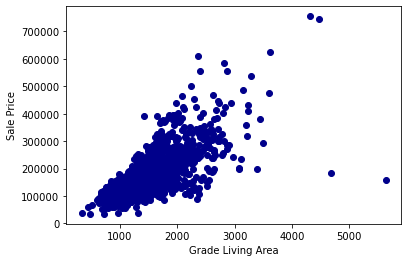

In [92]:
# 전체 데이터 이상치 처리 
# 가격 상관관계가 높은 피처 : GrLivArea: Above grade (ground) living area square feet
# 원데이터(house_df_org)의 데이터 분포 산점도로 확인
plt.scatter(house_df_org['GrLivArea']
            , house_df_org['SalePrice'], c = 'darkblue' 
           )
plt.xlabel('Grade Living Area')
plt.ylabel('Sale Price')

plt.show()

- 위에서 이상치 포인트 시각적으로 확인-> 이상치 처리할 범위를 가늠할수 있다
- condition 1. GrLivArea > 4000 
- condition 2. SalePrice < 500000

위 조건에 해당하면 이상치

In [95]:
# GrLivArea, SalePrice 조건 생성
# cond1 => GrLivArea 조건, cond2 : SalePrice조건
cond1 = house_df_ohe['GrLivArea']> np.log1p(4000)
cond2 = house_df_ohe['SalePrice']< np.log1p(500000)

# 이상치의 로우인덱스 추출
outlier_index = house_df_ohe[cond1 & cond2].index
outlier_index

Int64Index([523, 1298], dtype='int64')

In [97]:
house_df_org.iloc[523, :][['GrLivArea','SalePrice']]

GrLivArea      4676
SalePrice    184750
Name: 523, dtype: object

In [98]:
house_df_org.iloc[1298, :][['GrLivArea','SalePrice']]

GrLivArea      5642
SalePrice    160000
Name: 1298, dtype: object

In [99]:
print('이상치 삭제전 데이터 shape:', house_df_ohe.shape)

house_df_ohe.drop(outlier_index, axis=0, inplace=True)

print('이상치 삭제 후 데이터 shape:', house_df_ohe.shape)

이상치 삭제전 데이터 shape: (1460, 271)
이상치 삭제 후 데이터 shape: (1458, 271)


In [100]:
# 바뀐 데이터 / 답 분리
y_target = house_df_ohe['SalePrice']
X_features = house_df_ohe.drop('SalePrice', axis=1, inplace=False)

# 학습/테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(
    X_features, y_target, test_size=0.3, random_state=0
)

In [101]:
# 학습 
# 모델 객체 생성: Ridge, Lasso
# 하이퍼 파라미터 튜닝 : alpha
ridge_reg = Ridge()
lasso_reg = Lasso()

ridge_params = { 'alpha':[0.05, 0.1, 1, 5, 8, 10, 12, 15, 20] }
lasso_params = { 'alpha':[0.001, 0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1,5, 10] }

# 성능 평가 get_best_estimator(model, params_p):
best_ridge = get_best_estimator(ridge_reg, ridge_params)
best_lasso = get_best_estimator(lasso_reg, lasso_params)

Ridge 5 CV 시 최적 평균 RMSE 값 : 0.1125, 최적 alpha:{'alpha': 8}
Lasso 5 CV 시 최적 평균 RMSE 값 : 0.1122, 최적 alpha:{'alpha': 0.001}


In [102]:
# get_rmses function : 여러개 모델(피팅 완료된) 입력, 각 모델의 RMSE 값 출력하는 함수
# parameter : models 
# models : lr_reg, ridge_reg, lasso_reg

# 모델 객체 생성
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
ridge_reg = Ridge(alpha=8)
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train, y_train)

models =[lr_reg, ridge_reg, lasso_reg]

# 함수 사용하여 RMSE 값 출력
get_rmses(models)

LinearRegression 로그 변환된 RMSE: 0.12
Ridge 로그 변환된 RMSE: 0.111
Lasso 로그 변환된 RMSE: 0.109


[0.11981529787948779, 0.11119887669130378, 0.1085925992784495]

이상치 처리하기 전
- LinearRegression 로그 변환된 RMSE: 0.17
- Ridge 로그 변환된 RMSE: 0.137
- Lasso 로그 변환된 RMSE: 0.133
[0.17006116990369377, 0.13653127970065895, 0.13318053764688703]


- 이전 결과 대비 성능 향상 큼 -> 이상치의 영향도가 매우 큼을 알수있음(이상치를 가지는 단 2개의 데이터만 지워도 성능향상이 크다)


### 지금까지는 기본적인 회귀모델인 Linear Regression, Ridge, Lasso 알고리즘으로만 예측했다
### 추가적인 성능향상을 위해 앙상블(트리계열 회귀) 알고리즘을 적용해보겠다 p.370~

In [103]:
# 앙상블 (트리계열) 회귀 트리 적용
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [104]:
# get_best_estimator(model, params_p) 사용: gridsearchCV 사용된 함수다.
# 출력 : RMSE를 출력하고, return 으로 best 모델을 반환하다.

xgb_param = {
     'n_estimators' :[1000]
}

xgb_reg = XGBRegressor(
    n_estimators=1000
    , learning_rate=0.05
    , colsample_bytree=0.5  # 50% 의 컬럼만 갖다 쓴다.column 단위 (오버피팅 방지)
    , subsample=0.8    # 총 데이터에서 80% 만 갖다 쓴다.row 단위 (오버피팅 방지)
)

best_xgb = get_best_estimator(xgb_reg,xgb_param)
best_xgb

[12:19:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:19:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:19:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:19:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:19:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:19:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBRegressor 5 CV 시 최적 평균 RMSE 값 : 0.115, 최적 alpha:{'n_estimators': 1000}


XGBRegressor(colsample_bytree=0.5, learning_rate=0.05, n_estimators=1000,
             subsample=0.8)

In [105]:
#LGBM 확인
lgbm_param = { 'n_estimators':[1000]
}

lgbm_reg = LGBMRegressor(
    n_estimators=1000
    , learning_rate=0.05
    , num_leaves=4   # lgbm 은 균등분할 방식이 아니므로, num_leaves 이 중요
    , subsample=0.6
    , colsample_bytree=0.4
    , reg_lambda=10
    , n_jobs= -1
)

best_lgbm = get_best_estimator(lgbm_reg, lgbm_param)

LGBMRegressor 5 CV 시 최적 평균 RMSE 값 : 0.1163, 최적 alpha:{'n_estimators': 1000}


In [ ]:
def get_best_estimator(model, params_p):
    grid_model = GridSearchCV(
        model, param_grid=params_p, scoring='neg_mean_squared_error', cv=5
    )
    grid_model.fit(X_features, y_target)  # 베스트 리턴
    rmse = np.sqrt(-1 * grid_model.best_score_)
    out_str = '{0} 5 CV 시 최적 평균 RMSE 값 : {1}, 최적 alpha:{2}'
    print(out_str.format(model.__class__.__name__, np.round(rmse, 4), grid_model.best_params_))
    return grid_model.best_estimator_

In [147]:
best_ = zip(best_lgbm.feature_importances_, best_lgbm.feature_name_)
best_

In [148]:
a = list(best_)

[(19, 'MSSubClass'),
 (78, 'LotFrontage'),
 (162, 'LotArea'),
 (174, 'OverallQual'),
 (113, 'OverallCond'),
 (134, 'YearBuilt'),
 (59, 'YearRemodAdd'),
 (18, 'MasVnrArea'),
 (84, 'BsmtFinSF1'),
 (21, 'BsmtFinSF2'),
 (47, 'BsmtUnfSF'),
 (133, 'TotalBsmtSF'),
 (113, '1stFlrSF'),
 (48, '2ndFlrSF'),
 (12, 'LowQualFinSF'),
 (165, 'GrLivArea'),
 (16, 'BsmtFullBath'),
 (0, 'BsmtHalfBath'),
 (27, 'FullBath'),
 (12, 'HalfBath'),
 (15, 'BedroomAbvGr'),
 (40, 'KitchenAbvGr'),
 (16, 'TotRmsAbvGrd'),
 (24, 'Fireplaces'),
 (112, 'GarageYrBlt'),
 (22, 'GarageCars'),
 (100, 'GarageArea'),
 (48, 'WoodDeckSF'),
 (50, 'OpenPorchSF'),
 (81, 'EnclosedPorch'),
 (12, '3SsnPorch'),
 (41, 'ScreenPorch'),
 (0, 'PoolArea'),
 (1, 'MiscVal'),
 (52, 'MoSold'),
 (45, 'YrSold'),
 (0, 'MSZoning_C_(all)'),
 (20, 'MSZoning_FV'),
 (0, 'MSZoning_RH'),
 (13, 'MSZoning_RL'),
 (4, 'MSZoning_RM'),
 (0, 'Street_Grvl'),
 (0, 'Street_Pave'),
 (2, 'LotShape_IR1'),
 (1, 'LotShape_IR2'),
 (0, 'LotShape_IR3'),
 (6, 'LotShape_Reg'),


In [156]:
b =sorted(a, key=lambda x : x[0], reverse=True)


[(174, 'OverallQual'),
 (165, 'GrLivArea'),
 (162, 'LotArea'),
 (134, 'YearBuilt'),
 (133, 'TotalBsmtSF'),
 (113, 'OverallCond'),
 (113, '1stFlrSF'),
 (112, 'GarageYrBlt'),
 (100, 'GarageArea'),
 (84, 'BsmtFinSF1'),
 (81, 'EnclosedPorch'),
 (78, 'LotFrontage'),
 (59, 'YearRemodAdd'),
 (52, 'MoSold'),
 (50, 'OpenPorchSF'),
 (48, '2ndFlrSF'),
 (48, 'WoodDeckSF'),
 (47, 'BsmtUnfSF'),
 (45, 'YrSold'),
 (41, 'ScreenPorch')]

In [162]:
x = [i[0] for i in b]
y = [i[1] for i in b]

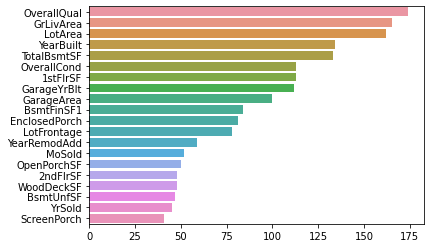

In [163]:
# 생성된 최적 lgbm 모델에서의 피처 중요도 시각화(상위 20개)ㅐ
sns.barplot(x=x[:20], y = y[:20])

## 혼합 모델의 성능 확인해보기 (책보고 해보기) p.371~

## 스태킹 모델을 통한 회귀 예측 (책보고 해보기)  p. 373~
- 스태킹 모델은 분류뿐아니라 회귀에서 특히 효과적으로 사용된다